### Sequential Models 

### Obbjectives:
- Practice creating sequential models with Keras for different tasks:
    - Classification
    - Regression
- Test different architectures: wide vs. deep, complex/simple models
- Learn how to use different techniques to fight with underfitting and overfitting

### COVID-19 Real World Worry Dataset

- In this task, we will build a network to predict the levels of worry people feel about Covid-19. 
- The dataset contains a column "worry", which gives the level of worry each participant in this study reported. Let's create a `binary` variable called "worry_level", which is set to 1 (i.e. high) if `worry>5`, otherwise, 0 (i.e. low)
- The dataset also contains two textual columns: `text_short` and `text_long`, which describes how each participant feels about the pandemic. For this assignment, we'll only use `text_short` column to predict the level of worry.
- The details of the dataset can be found at https://arxiv.org/abs/2004.04225. 

In [90]:
import pandas as pd
import keras

data = pd.read_csv("RWWD.csv")
    
data["worry_level"] = data.worry.apply(lambda x: 1 if x>5 else 0)
data.head()



,ID,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,text_long,text_short,worry_level
0,1,3,Sadness,5,5,3,7,7,2,4,5,It is less an much an issue of how it affects ...,It is very easy! Stay inside so you are not sp...,0
1,2,8,Anxiety,6,7,7,8,6,4,3,1,I am concerned that the true impact of the cur...,"Things are difficult now, but we must all pull...",1
2,3,4,Relaxation,1,1,2,2,4,7,7,2,"Personally, I am fairly calm about the corona ...","People should try and remain calm, as panic wi...",0
3,4,6,Relaxation,4,2,3,4,1,6,7,3,In this very moment as I am fortunate to be ab...,Fortunate to feel calm and relaxed but worried...,1
4,5,6,Anxiety,2,2,5,5,5,4,4,4,I am more worried about getting access to my n...,Not being able to cuddle my family sucks!,1


### Task 1: Prepare data
- We need to vectorize `text_short` column using a classical approach called `TF-IDF (Term Frequency and Inverse Document Frequency)`. 
- After vectorization, you'll get an array, where each document in `text_short` column is represented as a row and each word is a column. If a word (say $j$) appears in the document (say $i$), the value at $(i, j)$ is the `TF-IDF` weight of the word in the document.
- Save the result of vectorization as a `dense array, not a sparse array`. When fitting Keras model, dense arrays are expected

In [91]:
# Write script to vectorize text_short column

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
col=data.iloc[:,12]
arrs=col.values
print(arrs)
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_arrs = tfidfvectorizer.fit_transform(arrs)
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_arrs.toarray(),columns = tfidf_tokens)

print(df_tfidfvect)


         



["It is very easy! Stay inside so you are not spreading to vulnerable people. If you have to work, do not use public transport, don't travel share and work at home if your job permits. "
 'Things are difficult now, but we must all pull together to get through this.  We must remember the things we are going through now to ensure the decisions we make in future help us should a similar situation arise again. '
 'People should try and remain calm, as panic will only make the situation worse'
 ... 'Please stay home to keep us all alive '
 "There are people who still believe it is okay to leave outside even after the strict lockdown rules being set in stone even if the weather is nice outside no excuse your just putting yourself in danger and other's those who own garden can spend time flowering sunbathing etc. "
 'This is the worst. ']
      000   10  100   12   14   15  15th   16        19  1918 ...   young  \
0     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.000000   0.0 ...     0.0   
1 

C:\Users\Jiang\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


### Task 2: Create seqential models to classify `short_text` into `worry_level` in different architectures
- After vectorization, create a neural network model which takes the vectors of `short_text` as an input and predicts the binary `worry_level`.
- Create three different sequential models as shown in the figure below.
    1. Model A: This model only has one hidden layer with 256 units
    2. Model B: This model only has one hidden layer with 128 units
    3. Model C: This model has two hidden layers. The first hidden layer has 128 units and the second hidden layer has 32 units.
- Set aside 20% of them as the test subset (i.e. `x_test, y_test`). From the remaining samples, set aside 20% of the samples for validation (i.e. `x_val, y_val`)
- Define a function `fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test)`, and use this function to train each `model` as follows:
    - Train with appropriate hyperparameters, including `optimizer`, `loss function`, `epochs`, and `batch_size`
    - After training, calculate the loss and accuracy of each model on the test dataset (i.e. `x_test, y_test`) and print them out
    - Return training history  
- Plot validation loss and validation accuracy vs. epoches from the training histories of these three models


In [92]:
# fix random number so model results can be replicated

from numpy.random import seed
from tensorflow.random import set_random_seed # tf version = 1.15.0 

seed(123)
set_random_seed(231)


In [93]:
from keras.utils import plot_model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot


train_x_1 =  df_tfidfvect.iloc[:int(df_tfidfvect.shape[0] * 0.8), :]
x_test=  np.array(df_tfidfvect.iloc[int(df_tfidfvect.shape[0] * 0.8):, :])
train_y_1 = data.iloc[:int(data.shape[0] * 0.8), -1]
y_test= np.array(data.iloc[int(data.shape[0] * 0.8):, -1])

                                                    

In [94]:
x_val = np.array(train_x_1[:int(train_x_1.shape[0] * 0.2)])
x_train = np.array(train_x_1[int(train_x_1.shape[0] * 0.2):])
print(x_train.shape,x_val.shape,x_test.shape)





(1594, 4402) (398, 4402) (499, 4402)


In [95]:
y_val = np.array(train_y_1[:int(train_y_1.shape[0] * 0.2)])
y_train = np.array(train_y_1[int(train_y_1.shape[0] * 0.2):])
print(y_train.shape,y_val.shape,y_test.shape)




(1594,) (398,) (499,)


In [96]:
# Define model A

# add your code here
modela = Sequential()
modela.add(Dense(units=256, activation='relu',input_dim = 4402))   
modela.add(Dense(units=1, activation='sigmoid')) 

# Display model graph - optional
# G = model_to_dot (modela)
# Image (G.create (prog = "dot", format = "png"))

In [9]:
modela.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1127168   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,127,425
Trainable params: 1,127,425
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Define Model B

# add your code here
modelb = Sequential()
modelb.add(Dense(units=128, activation='relu',input_dim = 4402))   
modelb.add(Dense(units=1, activation='sigmoid')) 

# Display model graph
#G = model_to_dot (modelb)
#Image (G.create (prog = "dot", format = "png"))

In [11]:
modelb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               563584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 563,713
Trainable params: 563,713
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Define Model C

# add your code here
modelc = Sequential()
modelc.add(Dense(units=128, activation='relu',input_dim =4402 ))   
modelc.add(Dense(units=32, activation='relu'))
modelc.add(Dense(units=1, activation='sigmoid'))  

# Display model graph
#G = model_to_dot (modelc)
#Image (G.create (prog = "dot", format = "png"))

In [13]:
modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               563584    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 567,745
Trainable params: 567,745
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Split training dataset into train, test and validation subsets

from sklearn.model_selection import train_test_split

# add your code here



In [99]:
# Define fit_model function
def fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    '''Input: model, x_train, y_train, x_val, y_val, x_test, y_test'''
    '''Output: training history'''
    
    history = None


    model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data = (x_val, y_val),
                     epochs=100, batch_size=128,verbose=1)
    
    # please print out the performance on test subset
    score = model.evaluate(x_test, y_test, batch_size=128,verbose=1)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    
    return history


In [100]:
# Fit model A
hista = fit_model(modela, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 611us/step - loss: 0.6904 - acc: 0.5841 - val_loss: 0.6815 - val_acc: 0.7864
Epoch 2/100
1594/1594 [==============================] - 0s 124us/step - loss: 0.6754 - acc: 0.7854 - val_loss: 0.6670 - val_acc: 0.7915
Epoch 3/100
1594/1594 [==============================] - 0s 128us/step - loss: 0.6618 - acc: 0.7867 - val_loss: 0.6537 - val_acc: 0.7915
Epoch 4/100
1594/1594 [==============================] - 0s 131us/step - loss: 0.6492 - acc: 0.7867 - val_loss: 0.6414 - val_acc: 0.7915
Epoch 5/100
1594/1594 [==============================] - 0s 118us/step - loss: 0.6375 - acc: 0.7867 - val_loss: 0.6299 - val_acc: 0.7915
Epoch 6/100
1594/1594 [==============================] - 0s 138us/step - loss: 0.6267 - acc: 0.7867 - val_loss: 0.6194 - val_acc: 0.7915
Epoch 7/100
1594/1594 [==============================] - 0s 134us/step - loss: 0.6166 - acc: 0.7867 - val_loss: 0.6098 - val_acc: 0

1594/1594 [==============================] - 0s 132us/step - loss: 0.5168 - acc: 0.7867 - val_loss: 0.5113 - val_acc: 0.7915
Epoch 61/100
1594/1594 [==============================] - 0s 131us/step - loss: 0.5168 - acc: 0.7867 - val_loss: 0.5113 - val_acc: 0.7915
Epoch 62/100
1594/1594 [==============================] - 0s 138us/step - loss: 0.5167 - acc: 0.7867 - val_loss: 0.5112 - val_acc: 0.7915
Epoch 63/100
1594/1594 [==============================] - 0s 142us/step - loss: 0.5166 - acc: 0.7867 - val_loss: 0.5112 - val_acc: 0.7915
Epoch 64/100
1594/1594 [==============================] - 0s 131us/step - loss: 0.5166 - acc: 0.7867 - val_loss: 0.5111 - val_acc: 0.7915
Epoch 65/100
1594/1594 [==============================] - 0s 122us/step - loss: 0.5166 - acc: 0.7867 - val_loss: 0.5111 - val_acc: 0.7915
Epoch 66/100
1594/1594 [==============================] - 0s 118us/step - loss: 0.5165 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 67/100
1594/1594 [=======================

In [101]:
# Fit Model B
histb = fit_model(modelb, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 576us/step - loss: 0.6855 - acc: 0.7089 - val_loss: 0.6778 - val_acc: 0.7915
Epoch 2/100
1594/1594 [==============================] - 0s 97us/step - loss: 0.6710 - acc: 0.7867 - val_loss: 0.6635 - val_acc: 0.7915
Epoch 3/100
1594/1594 [==============================] - 0s 91us/step - loss: 0.6575 - acc: 0.7867 - val_loss: 0.6503 - val_acc: 0.7915
Epoch 4/100
1594/1594 [==============================] - 0s 105us/step - loss: 0.6448 - acc: 0.7867 - val_loss: 0.6377 - val_acc: 0.7915
Epoch 5/100
1594/1594 [==============================] - 0s 96us/step - loss: 0.6329 - acc: 0.7867 - val_loss: 0.6259 - val_acc: 0.7915
Epoch 6/100
1594/1594 [==============================] - 0s 92us/step - loss: 0.6217 - acc: 0.7867 - val_loss: 0.6150 - val_acc: 0.7915
Epoch 7/100
1594/1594 [==============================] - 0s 93us/step - loss: 0.6114 - acc: 0.7867 - val_loss: 0.6050 - val_acc: 0.7915

In [102]:
# Fit Model C
histc = fit_model(modelc, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 593us/step - loss: 0.6783 - acc: 0.7811 - val_loss: 0.6672 - val_acc: 0.7915
Epoch 2/100
1594/1594 [==============================] - 0s 96us/step - loss: 0.6574 - acc: 0.7867 - val_loss: 0.6448 - val_acc: 0.7915
Epoch 3/100
1594/1594 [==============================] - 0s 100us/step - loss: 0.6356 - acc: 0.7867 - val_loss: 0.6234 - val_acc: 0.7915
Epoch 4/100
1594/1594 [==============================] - 0s 93us/step - loss: 0.6156 - acc: 0.7867 - val_loss: 0.6042 - val_acc: 0.7915
Epoch 5/100
1594/1594 [==============================] - 0s 84us/step - loss: 0.5980 - acc: 0.7867 - val_loss: 0.5874 - val_acc: 0.7915
Epoch 6/100
1594/1594 [==============================] - 0s 91us/step - loss: 0.5830 - acc: 0.7867 - val_loss: 0.5740 - val_acc: 0.7915
Epoch 7/100
1594/1594 [==============================] - 0s 93us/step - loss: 0.5710 - acc: 0.7867 - val_loss: 0.5623 - val_acc: 0.7915

1594/1594 [==============================] - 0s 97us/step - loss: 0.5158 - acc: 0.7867 - val_loss: 0.5111 - val_acc: 0.7915
Epoch 61/100
1594/1594 [==============================] - 0s 97us/step - loss: 0.5158 - acc: 0.7867 - val_loss: 0.5111 - val_acc: 0.7915
Epoch 62/100
1594/1594 [==============================] - 0s 94us/step - loss: 0.5157 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 63/100
1594/1594 [==============================] - 0s 96us/step - loss: 0.5157 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 64/100
1594/1594 [==============================] - 0s 100us/step - loss: 0.5156 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 65/100
1594/1594 [==============================] - 0s 96us/step - loss: 0.5156 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 66/100
1594/1594 [==============================] - 0s 100us/step - loss: 0.5156 - acc: 0.7867 - val_loss: 0.5110 - val_acc: 0.7915
Epoch 67/100
1594/1594 [============================

In [103]:
# Use exponential decay to smooth performance curve (optional)


def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


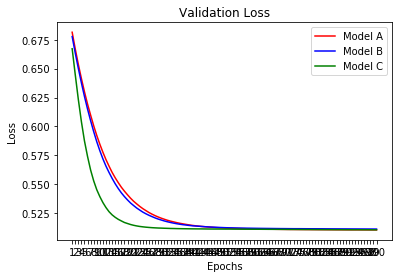

In [104]:
# Plot validation loss curves


# add your code here
import matplotlib.pyplot as plt

#epochs=list(range(0,10))
epochs = range(1, len(hista.history['val_loss']) + 1)

val_loss_a = hista.history['val_loss']
val_loss_b = histb.history['val_loss']
val_loss_c = histc.history['val_loss']

plt.plot(epochs, val_loss_a, 'r', label='Model A')
plt.plot(epochs, val_loss_b, 'b', label='Model B')
plt.plot(epochs, val_loss_c, 'g', label='Model C')

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()





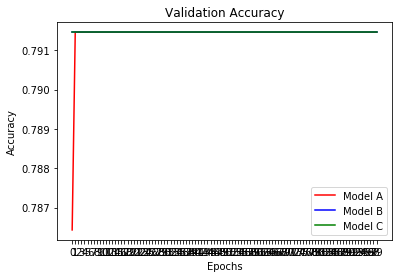

In [105]:
# Plot validation accuracy curves
epochs=list(range(0,100))

# add your code here
val_acc_a = hista.history['val_acc']
val_acc_b = histb.history['val_acc']
val_acc_c = histc.history['val_acc']

plt.plot(epochs, val_acc_a, 'r', label='Model A')
plt.plot(epochs, val_acc_b, 'b', label='Model B')
plt.plot(epochs, val_acc_c, 'g', label='Model C')

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

Analysis

1.For each model, from which epoch, overfitting started happening?
- From my results, I don't find overfitting situation.

2.Which model in general performs the best in terms of valiation loss or validation accuracy?
- For three medels, I find that the validation accuracies are the same. Maybe the Model C will have best performance because of the validation loss value.

3.Please explain why this model outperforms the others
- Maybe ModelC have two hidden layers.














### Task 3: Fight overfitting 
- Let's take **Model B** and try the following strategies to overcome overfitting
    1. Model B1 (**Dropout**): Add a `Dropout` layer with dropout rate 0.5 to `after the input` (i.e. randomly drop 50% of the input; place it `before the the hidden layer`). Then add another `Dropout` layer with dropout rate 0.5 `after the hidden layer`
    2. Model B2 (**L2 Regularizer**): Add L2 kernel regularization with a coefficient of 0.001 in the hidden layer.
- Train each model as in Task 2 
- Plot validation loss and validation accuracy vs. epoches from the training histories of these <font color=red>three</font> models: B, B1, B2


In [106]:
# Define Model B1
from keras.layers import Dropout
# add your code here
modelb1 = Sequential()
modelb1.add(Dropout(0.5, input_shape=(4402,)))
modelb1.add(Dense(units=128, activation='relu'))   
modelb1.add(Dropout(0.5))
modelb1.add(Dense(units=1, activation='sigmoid')) 
modelb1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
# Define Model B2
from keras import regularizers
# add your code here
modelb2 = Sequential()
modelb2.add(Dense(units=128, activation='relu',input_dim = 4402,kernel_regularizer=regularizers.l2(0.001)))   
modelb2.add(Dense(units=1, activation='sigmoid')) 
modelb2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
# Define Model B

# add your code here
modelb = Sequential()
modelb.add(Dense(units=128, activation='relu',input_dim = 4402))   
modelb.add(Dense(units=1, activation='sigmoid')) 
modelb.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
# Display model graph
#G = model_to_dot (modelb)
#Image (G.create (prog = "dot", format = "png"))

In [109]:
# Fit Model B1
histb1 = fit_model(modelb1, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 745us/step - loss: 0.6810 - acc: 0.7102 - val_loss: 0.6740 - val_acc: 0.7915
Epoch 2/100
1594/1594 [==============================] - 0s 134us/step - loss: 0.6660 - acc: 0.7829 - val_loss: 0.6597 - val_acc: 0.7915
Epoch 3/100
1594/1594 [==============================] - 0s 143us/step - loss: 0.6528 - acc: 0.7867 - val_loss: 0.6461 - val_acc: 0.7915
Epoch 4/100
1594/1594 [==============================] - 0s 145us/step - loss: 0.6390 - acc: 0.7867 - val_loss: 0.6335 - val_acc: 0.7915
Epoch 5/100
1594/1594 [==============================] - 0s 130us/step - loss: 0.6287 - acc: 0.7867 - val_loss: 0.6215 - val_acc: 0.7915
Epoch 6/100
1594/1594 [==============================] - 0s 133us/step - loss: 0.6169 - acc: 0.7867 - val_loss: 0.6106 - val_acc: 0.7915
Epoch 7/100
1594/1594 [==============================] - 0s 133us/step - loss: 0.6076 - acc: 0.7867 - val_loss: 0.6005 - val_acc: 0

1594/1594 [==============================] - 0s 144us/step - loss: 0.5188 - acc: 0.7867 - val_loss: 0.5121 - val_acc: 0.7915
Epoch 61/100
1594/1594 [==============================] - 0s 128us/step - loss: 0.5193 - acc: 0.7867 - val_loss: 0.5120 - val_acc: 0.7915
Epoch 62/100
1594/1594 [==============================] - 0s 137us/step - loss: 0.5190 - acc: 0.7867 - val_loss: 0.5120 - val_acc: 0.7915
Epoch 63/100
1594/1594 [==============================] - 0s 151us/step - loss: 0.5168 - acc: 0.7867 - val_loss: 0.5120 - val_acc: 0.7915
Epoch 64/100
1594/1594 [==============================] - 0s 156us/step - loss: 0.5176 - acc: 0.7867 - val_loss: 0.5120 - val_acc: 0.7915
Epoch 65/100
1594/1594 [==============================] - 0s 137us/step - loss: 0.5176 - acc: 0.7867 - val_loss: 0.5119 - val_acc: 0.7915
Epoch 66/100
1594/1594 [==============================] - 0s 154us/step - loss: 0.5174 - acc: 0.7867 - val_loss: 0.5119 - val_acc: 0.7915
Epoch 67/100
1594/1594 [=======================

In [110]:
# Fit Model B2

histb2 = fit_model(modelb2, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 743us/step - loss: 0.9318 - acc: 0.7503 - val_loss: 0.9235 - val_acc: 0.7915
Epoch 2/100
1594/1594 [==============================] - 0s 109us/step - loss: 0.9171 - acc: 0.7867 - val_loss: 0.9093 - val_acc: 0.7915
Epoch 3/100
1594/1594 [==============================] - 0s 134us/step - loss: 0.9035 - acc: 0.7867 - val_loss: 0.8957 - val_acc: 0.7915
Epoch 4/100
1594/1594 [==============================] - 0s 123us/step - loss: 0.8906 - acc: 0.7867 - val_loss: 0.8831 - val_acc: 0.7915
Epoch 5/100
1594/1594 [==============================] - 0s 124us/step - loss: 0.8786 - acc: 0.7867 - val_loss: 0.8713 - val_acc: 0.7915
Epoch 6/100
1594/1594 [==============================] - 0s 138us/step - loss: 0.8674 - acc: 0.7867 - val_loss: 0.8601 - val_acc: 0.7915
Epoch 7/100
1594/1594 [==============================] - 0s 122us/step - loss: 0.8569 - acc: 0.7867 - val_loss: 0.8498 - val_acc: 0

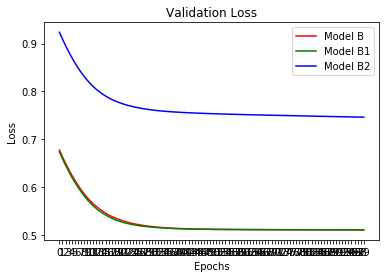

In [112]:
# Plot validation loss curves

# add your code here
epochs=list(range(0,100))

val_loss_B = histb.history['val_loss']
val_loss_B1 = histb1.history['val_loss']
val_loss_B2 = histb2.history['val_loss']

plt.plot(epochs, val_loss_B, 'r', label='Model B')
plt.plot(epochs, val_loss_B1, 'g', label='Model B1')
plt.plot(epochs, val_loss_B2, 'b', label='Model B2')

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

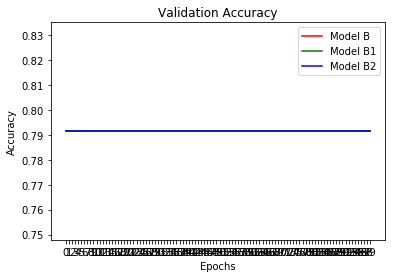

In [114]:
# Plot validation accuracy curves
epochs=list(range(0,100))
# add your code here
val_acc_B = histb.history['val_acc']
val_acc_B1 = histb1.history['val_acc']
val_acc_B2 = histb2.history['val_acc']

plt.plot(epochs, val_acc_B, 'r', label='Model B')
plt.plot(epochs, val_acc_B1, 'g', label='Model B1')
plt.plot(epochs, val_acc_B2, 'b', label='Model B2')

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()


Analysis 

1.Did any of the strategies improve model performance on the test dataset?
- Yes， but not obvious.

2.For each regularized model, did you still observe overfitting? In this case, which strategy is the most effective in reducing overfing?tti
- No. maybe modelB1 using dropout have better performance.







### Task 4: Create neural network model for regression task 
- In this task, let's create a model to predict specific `worry` level (`1-9`) using `text_short` column. Let's consider this as a `regression` task instead of classification, because it would be difficult to differenitate levels precisely (e.g. levels 4 and 5). We'd like to predict a level which can be close to the target level as much as possible.
- Let's reuse the best models you achieved for Task 1 and Task 2. Modify these models to for the regression task. Also, modify the `fit_model` function accordingly. Specifically, you need to modify:
  - Activation function of the output layer
  - Loss function 
- Similarly, split the samples to training, test, evaluation subsets as before. Note, for this task, the target is `worry` column in the dataset
- After training, use the model to predict <font color=red>'worry'</font> on the test subset and print out the test loss.
- Plot validation loss vs. epoches from the training histories of these models
- Did the regularization strategy improves model performance on the validation dataset? Write your analysis (as markdowns)
- `Note, due to randomness, you may observe different results in each round. You just need to analyze based on one round of the results you obtained`.

In [115]:
# Define model with regularization

# add your code here
model3 = Sequential()
model3.add(Dense(units=128, activation='relu',input_dim =4402 ))   
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=1)) 




In [116]:
# Define model with regularization

# add your code here
model4 = Sequential()
model4.add(Dense(units=128, activation='relu',input_dim =4402,activity_regularizer=regularizers.l1(0.01)))   
model4.add(Dense(units=32, activation='relu'))
model4.add(Dense(units=1)) 


In [120]:
# Define fit_model function
def fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    
    history = None
    
    model.compile(optimizer='sgd',loss='mean_squared_error')

    history = model.fit(x_train, y_train, validation_data = (x_val, y_val),
                    batch_size=128,
                    epochs=100,
                    verbose=1)
    
    # please print out the performance on test subset
    
    y_pred = model.predict(x_test)

    score = model.evaluate(x_test, y_test, batch_size=128,
                        verbose=1)
    print('Test loss:', score)
    
    
    
    return history

In [118]:
# split data into training, evaluation, and test subsets

from sklearn.model_selection import train_test_split

 # add your code here
train_x_1 =  df_tfidfvect.iloc[:int(df_tfidfvect.shape[0] * 0.8), :]
x_test=  np.array(df_tfidfvect.iloc[int(df_tfidfvect.shape[0] * 0.8):, :])
train_y_1 = data.iloc[:int(data.shape[0] * 0.8), 1]
y_test= np.array(data.iloc[int(data.shape[0] * 0.8):, 1])

x_val = np.array(train_x_1[:int(train_x_1.shape[0] * 0.2)])
x_train = np.array(train_x_1[int(train_x_1.shape[0] * 0.2):])
x_val.shape

y_val = np.array(train_y_1[:int(train_y_1.shape[0] * 0.2)])
y_train = np.array(train_y_1[int(train_y_1.shape[0] * 0.2):])
print(y_train.shape,y_test.shape)

(1594,) (499,)


In [121]:
hist3 = fit_model(model3, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 634us/step - loss: 2.9483 - val_loss: 2.8717
Epoch 2/100
1594/1594 [==============================] - 0s 96us/step - loss: 2.9226 - val_loss: 2.9506
Epoch 3/100
1594/1594 [==============================] - 0s 98us/step - loss: 2.9191 - val_loss: 2.8290
Epoch 4/100
1594/1594 [==============================] - 0s 93us/step - loss: 2.9107 - val_loss: 2.8177
Epoch 5/100
1594/1594 [==============================] - 0s 91us/step - loss: 2.8957 - val_loss: 2.8454
Epoch 6/100
1594/1594 [==============================] - 0s 94us/step - loss: 2.8736 - val_loss: 2.8025
Epoch 7/100
1594/1594 [==============================] - 0s 92us/step - loss: 2.8564 - val_loss: 2.8289
Epoch 8/100
1594/1594 [==============================] - 0s 93us/step - loss: 2.8510 - val_loss: 2.7686
Epoch 9/100
1594/1594 [==============================] - 0s 88us/step - loss: 2.8420 - val_loss: 3.0374
Epoch 10/100
159

In [122]:
hist4 = fit_model(model4, x_train, y_train, \
                          x_val, y_val, \
                          x_test, y_test)

Train on 1594 samples, validate on 398 samples
Epoch 1/100
1594/1594 [==============================] - 1s 723us/step - loss: 28.6251 - val_loss: 9.2739
Epoch 2/100
1594/1594 [==============================] - 0s 113us/step - loss: 6.3785 - val_loss: 4.9607
Epoch 3/100
1594/1594 [==============================] - 0s 116us/step - loss: 4.4072 - val_loss: 3.9180
Epoch 4/100
1594/1594 [==============================] - 0s 138us/step - loss: 3.6402 - val_loss: 3.3094
Epoch 5/100
1594/1594 [==============================] - 0s 137us/step - loss: 3.2785 - val_loss: 3.0502
Epoch 6/100
1594/1594 [==============================] - 0s 126us/step - loss: 3.1304 - val_loss: 3.0094
Epoch 7/100
1594/1594 [==============================] - 0s 117us/step - loss: 3.1121 - val_loss: 2.9788
Epoch 8/100
1594/1594 [==============================] - 0s 94us/step - loss: 3.1081 - val_loss: 3.0008
Epoch 9/100
1594/1594 [==============================] - 0s 109us/step - loss: 3.1054 - val_loss: 2.9837
Epoch 10

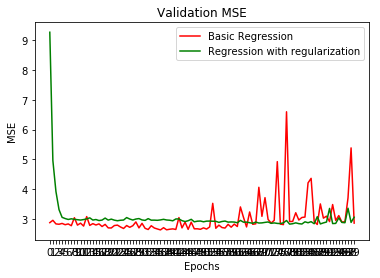

In [128]:
# Plot evaluation performance of two models

# add your code here
epochs=list(range(0,100))

val_loss_3 = hist3.history['val_loss']
val_loss_4 = hist4.history['val_loss']


plt.plot( epochs,val_loss_3, 'r', label='Basic Regression')
plt.plot( epochs,val_loss_4, 'g', label='Regression with regularization')

plt.title('Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.xticks(epochs)
plt.legend()

plt.show()

Analysis 
1.Did the regularization strategy improves model performance on the validation dataset?
- Yes. The regularization strategy imporves model perfomance. From the picture, we can find the loss of regression with regularization beter than other one.